# Business Case

To classify the three major diseases of rice plants(images) using convolutional Neural Network(CNN). 

# Project Summary

The Data science project which is given here is to classify the rice leaf disease detection. The project goal is to classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot. The need for an accurate and efficient disease detection solution using various techniques like Data Augmentation.

The dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes which is a multiclass based on the type of disease.There are 40 images in each class.

This dataset is a complete images to classify the three major diseases of rice plants using Convolutional Neural Network(CNN).

# Requirement

INSIGHTS OF THE PROJECT :

# Deep Learning Model Process using CNN

The deep learning model is used in this project is CNN(Convolutional Neural Network). This model is best for image 
classification to detect the diseases.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Importing libraries for Model Selection

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout 

# Model Selection

In [3]:
#Initialize the model
model = Sequential()

#First set of Layer
#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(256, 256, 3)))
#Activation Layer
model.add(Activation('relu'))
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

#Second set of Layer
#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(3,3)))
#Activation Layer
model.add(Activation('relu'))
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Third set of Layer
#Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(3,3)))
#Activation Layer
model.add(Activation('relu'))
#MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [4]:
#Flatten : It converts our 3D feature maps to 1D feature vectors
model.add(Flatten())
#Add fully connected neural network using dense function
model.add(Dense(128, activation='relu'))
#Generalizing (avoiding overfitting)
model.add(Dropout(0.5))


# LAST LAYER IS THE CLASSIFIER, THUS 3 CLASSES
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Data Augmentation

In [5]:
batch_size = 35

#Augmentation configuration using for training data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, fill_mode="nearest", shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#Augmentation configuration using for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading, Splitting the data and Feature Transformation

In [6]:
#loading and splitting the data
train_generator = train_datagen.flow_from_directory('/Users/sharmilanr/Sharmila/Datamites/Internship/Rubixe_Internship/Rice_Leaf_Disease/Data/train',target_size=(256,256),batch_size=batch_size)
validation_generator=test_datagen.flow_from_directory('/Users/sharmilanr/Sharmila/Datamites/Internship/Rubixe_Internship/Rice_Leaf_Disease/Data/test',target_size=(256,256),batch_size=batch_size)
                

Found 90 images belonging to 3 classes.
Found 29 images belonging to 3 classes.


# Model Trained for Prediction

In [7]:
import time

In [9]:
%%time
history = model.fit(
    train_generator,
    steps_per_epoch=119//batch_size,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=58//batch_size)

Epoch 1/40
3/3 [==============================] - 3s 1s/step - loss: 0.4154 - accuracy: 0.8333 - val_loss: 1.5537 - val_accuracy: 0.3793
Epoch 2/40
3/3 [==============================] - 2s 730ms/step - loss: 1.0098 - accuracy: 0.6556 - val_loss: 0.9047 - val_accuracy: 0.5172
Epoch 3/40
3/3 [==============================] - 2s 685ms/step - loss: 0.4500 - accuracy: 0.8778 - val_loss: 1.1186 - val_accuracy: 0.3793
Epoch 4/40
3/3 [==============================] - 2s 695ms/step - loss: 0.4304 - accuracy: 0.8556 - val_loss: 1.1541 - val_accuracy: 0.4138
Epoch 5/40
3/3 [==============================] - 2s 723ms/step - loss: 0.4224 - accuracy: 0.8667 - val_loss: 1.7609 - val_accuracy: 0.4828
Epoch 6/40
3/3 [==============================] - 3s 1s/step - loss: 0.5501 - accuracy: 0.7556 - val_loss: 1.1180 - val_accuracy: 0.4138
Epoch 7/40
3/3 [==============================] - 2s 728ms/step - loss: 0.4385 - accuracy: 0.8444 - val_loss: 1.4158 - val_accuracy: 0.4483
Epoch 8/40
3/3 [==========

The model’s accuracy on the input data is tracked at the end of every epoch.At the end of 40 epochs, we are able to achieve 93% accuracy on training data and 34.48% on validation data.

# History Plot

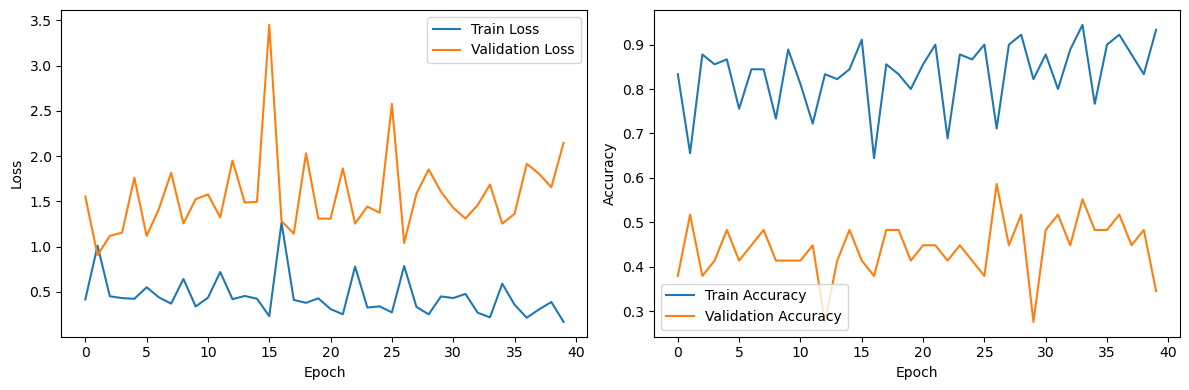

In [10]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

# Prediction images from downloads

# Brown Spot

In [11]:
img = load_img('/Users/sharmilanr/Downloads/brownspot.jpg')
x = img_to_array(img.resize([256,256]))
x = x.reshape((1,) + x.shape)


In [12]:
x.shape

(1, 256, 256, 3)

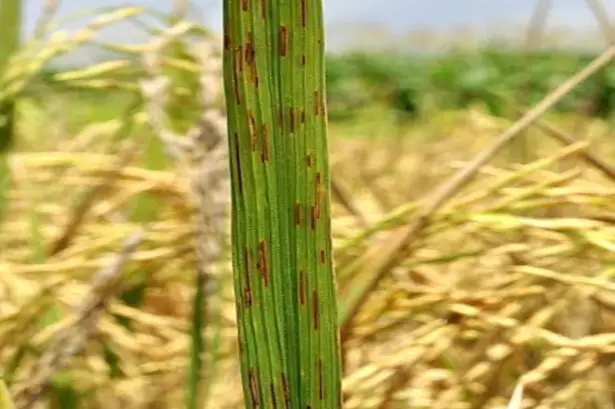

In [13]:
img

In [14]:
# Get predictions from the model
predictions = model.predict(x)

# Interpret predictions using if-else conditions
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']  # List of class names

# Get the predicted class index (0, 1, or 2 in your case)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Classify the image using if-else conditions
if predicted_class_index == 0:
    predicted_class_name = class_names[0]
elif predicted_class_index == 1:
    predicted_class_name = class_names[1]
else:
    predicted_class_name = class_names[2]

# Get the confidence score for the predicted class
confidence_score = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class_name}")
print(f"Confidence score: {confidence_score}")

1/1 [==============================] - 0s 71ms/step
Predicted class: Brown spot
Confidence score: 1.0


BrownSpot image downloaded from google to predict this model and This model also predicting Brown Spot only.

# Bacterial Leaf Blight

In [15]:
img = load_img('/Users/sharmilanr/Downloads/bacterial.jpg')
x = img_to_array(img.resize([256,256]))
x1 = x.reshape((1,) + x.shape)

In [16]:
x1.shape

(1, 256, 256, 3)

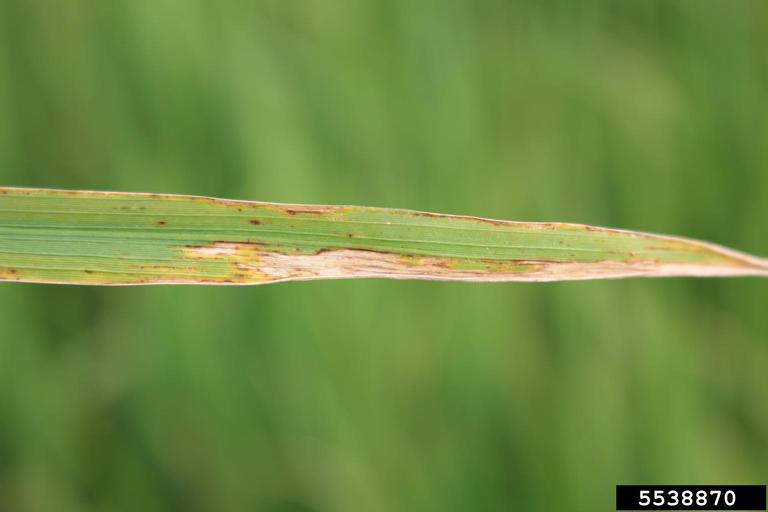

In [17]:
img

In [18]:
# Get predictions from the model
predictions = model.predict(x1)

# Interpret predictions using if-else conditions
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']  # List of class names

# Get the predicted class index (0, 1, or 2 in your case)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Classify the image using if-else conditions
if predicted_class_index == 0:
    predicted_class_name = class_names[0]
elif predicted_class_index == 1:
    predicted_class_name = class_names[1]
else:
    predicted_class_name = class_names[2]

# Get the confidence score for the predicted class
confidence_score = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class_name}")
print(f"Confidence score: {confidence_score}")

1/1 [==============================] - 0s 16ms/step
Predicted class: Bacterial leaf blight
Confidence score: 1.0


Bacterial leaf blight image downloaded from google to predict this model and This model also predicting Bacterial leaf
blight only.

# Leaf Smut

In [23]:
img = load_img('/Users/sharmilanr/Downloads/leaf.jpg')
x = img_to_array(img.resize([256,256]))
x2 = x.reshape((1,) + x.shape)

In [24]:
x2.shape

(1, 256, 256, 3)

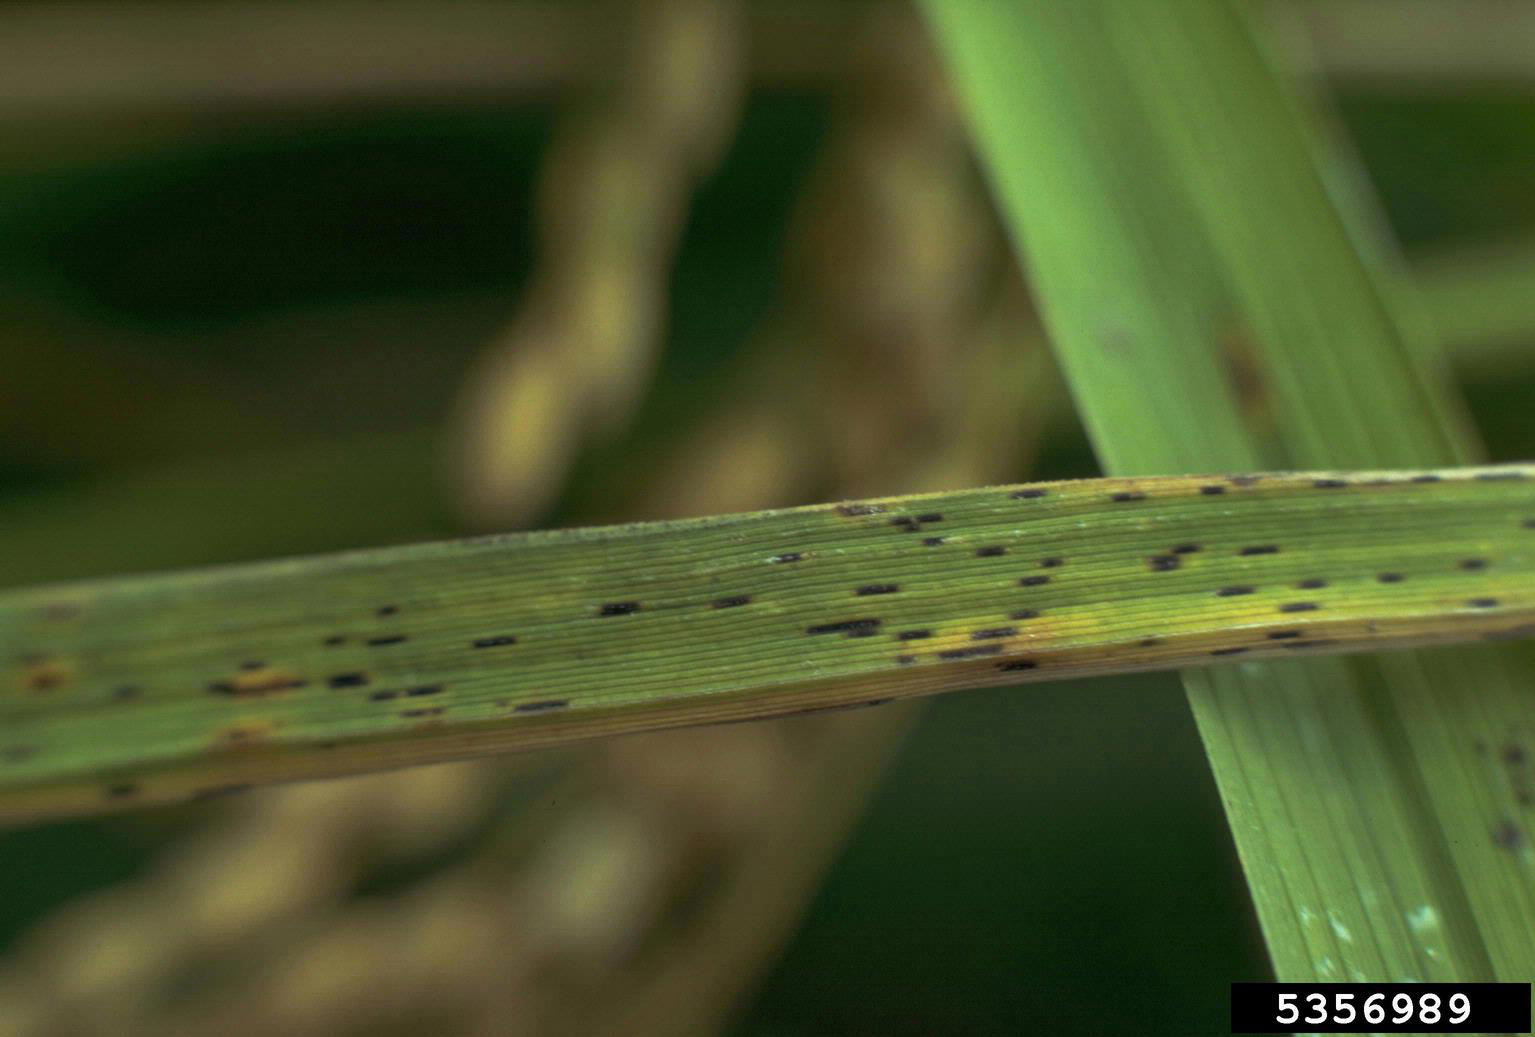

In [25]:
img

In [26]:
# Get predictions from the model
predictions = model.predict(x2)

# Interpret predictions using if-else conditions
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']  # List of class names

# Get the predicted class index (0, 1, or 2 in your case)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Classify the image using if-else conditions
if predicted_class_index == 0:
    predicted_class_name = class_names[0]
elif predicted_class_index == 1:
    predicted_class_name = class_names[1]
else:
    predicted_class_name = class_names[2]

# Get the confidence score for the predicted class
confidence_score = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class_name}")
print(f"Confidence score: {confidence_score}")

1/1 [==============================] - 0s 18ms/step
Predicted class: Leaf smut
Confidence score: 1.0


Leaf Smut image downloaded from google to predict this model and This model also predicting leaf smut only.

# Importing libraries for evaluate the training model

In [65]:
from sklearn.metrics import classification_report, accuracy_score

In [66]:
from sklearn.model_selection import train_test_split

# Loading the data

In [67]:
base_dir = "/Users/sharmilanr/Sharmila/Datamites/Internship/Rubixe_Internship/Rice_Leaf_Disease/eva_data"

# importing the data from directory

In [68]:
import os
LABELS = os.listdir(base_dir)
# Filter out .DS_Store files
LABELS = [item for item in LABELS if not item.startswith('.DS_Store')]
LABELS.sort()
LABELS

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Data splitting to Train as dataset and Test as testset

In [69]:
dataset=[]
testset=[]
count=0

for label in LABELS:
    i=0
    path = base_dir + '/' + label
    path = os.path.join(path, base_dir, label)
  
    for img in os.listdir(path):

        image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(256,256))
        image=img_to_array(image)
        image=image/255.0
        if i<30:
            dataset.append([image,count])
            i+=1
        else:
            testset.append([image,count])
    count=count+1

In [70]:
len(dataset)

90

In [71]:
len(testset)

29

# Splitting the data as X_Train, Y_Train, X_Test, Y_Test

In [72]:
X,y =zip(*dataset)
test,test_labels =zip(*testset)

In [73]:
len(X), len(y), len(test), len(test_labels)

(90, 90, 29, 29)

# Performing One-Hot Encoding

In [74]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [75]:
y=np.array(y)
X=np.array(X)
print("Train Shape:{}\nTrain Labels shape: {}".format(X.shape,y.shape))

Train Shape:(90, 256, 256, 3)
Train Labels shape: (90, 3)


In [76]:
len(y)

90

# Train-Test-Split

In [77]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

In [78]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((72, 256, 256, 3), (18, 256, 256, 3), (72, 3), (18, 3))

# Evaluate the Model for Training data

In [79]:
y_pred = model.predict(X_valid)
pred = np.argmax(y_pred,axis=1)
actual = np.argmax(y_valid,axis=1)
print(classification_report(actual,pred))

1/1 [==============================] - 0s 75ms/step
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.80      0.80      0.80         5
           2       0.73      1.00      0.84         8

    accuracy                           0.78        18
   macro avg       0.84      0.73      0.74        18
weighted avg       0.82      0.78      0.76        18



This model got 78% accuracy while evaluating the training data using classification report.

# Conclusion

In the above we bulid an image classification model using convolutional neural network for the given image dataset. In this dataset we have 119 images with different classes as 'Bacterial leaf blight','Leaf smut' and 'Brown spot'.

we seperated the data into trainset and testset. we get the accuracy as 93% accuracy on training data and 34.48% on validation data.Same model is also fit for the trainset, we get the accuracy as 78%.

We also classified images which is downloaded from google and we get Actual and Prediction images are same.This model is classified three major attacking diseases of rice plants like leaf smut, bacterial leaf blight and brown spot.